In [55]:
import pandas as pd
import nltk
import re
import string
from sklearn.preprocessing import LabelEncoder
from nltk.corpus import stopwords
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from pandas.plotting import scatter_matrix
from sklearn.neighbors import KNeighborsClassifier
import time
import warnings

# Filter & Ignore Warnings
warnings.filterwarnings('ignore')

# List Available `CSV` Files
import os


In [56]:
!pip install wordcloud
from wordcloud import WordCloud


In [57]:
df= pd.read_csv('Resume.csv')
df.head()

,ID,Resume_str,Resume_html,Category
0,16852973,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,"<div class=""fontsize fontface vmargins hmargin...",HR
1,22323967,"HR SPECIALIST, US HR OPERATIONS ...","<div class=""fontsize fontface vmargins hmargin...",HR
2,33176873,HR DIRECTOR Summary Over 2...,"<div class=""fontsize fontface vmargins hmargin...",HR
3,27018550,HR SPECIALIST Summary Dedica...,"<div class=""fontsize fontface vmargins hmargin...",HR
4,17812897,HR MANAGER Skill Highlights ...,"<div class=""fontsize fontface vmargins hmargin...",HR


In [58]:
df.shape

(2484, 4)

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2484 entries, 0 to 2483
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           2484 non-null   int64 
 1   Resume_str   2484 non-null   object
 2   Resume_html  2484 non-null   object
 3   Category     2484 non-null   object
dtypes: int64(1), object(3)
memory usage: 77.8+ KB


In [60]:
df.isnull().sum()

ID             0
Resume_str     0
Resume_html    0
Category       0
dtype: int64

In [61]:
df['Category'].unique()

array(['HR', 'DESIGNER', 'INFORMATION-TECHNOLOGY', 'TEACHER', 'ADVOCATE',
       'BUSINESS-DEVELOPMENT', 'HEALTHCARE', 'FITNESS', 'AGRICULTURE',
       'BPO', 'SALES', 'CONSULTANT', 'DIGITAL-MEDIA', 'AUTOMOBILE',
       'CHEF', 'FINANCE', 'APPAREL', 'ENGINEERING', 'ACCOUNTANT',
       'CONSTRUCTION', 'PUBLIC-RELATIONS', 'BANKING', 'ARTS', 'AVIATION'],
      dtype=object)

In [62]:
df['Category'].nunique()

24

In [63]:
categories = df['Category'].value_counts().reset_index()
categories

,index,Category
0,INFORMATION-TECHNOLOGY,120
1,BUSINESS-DEVELOPMENT,120
2,FINANCE,118
3,ADVOCATE,118
4,ACCOUNTANT,118
5,ENGINEERING,118
6,CHEF,118
7,AVIATION,117
8,FITNESS,117
9,SALES,116


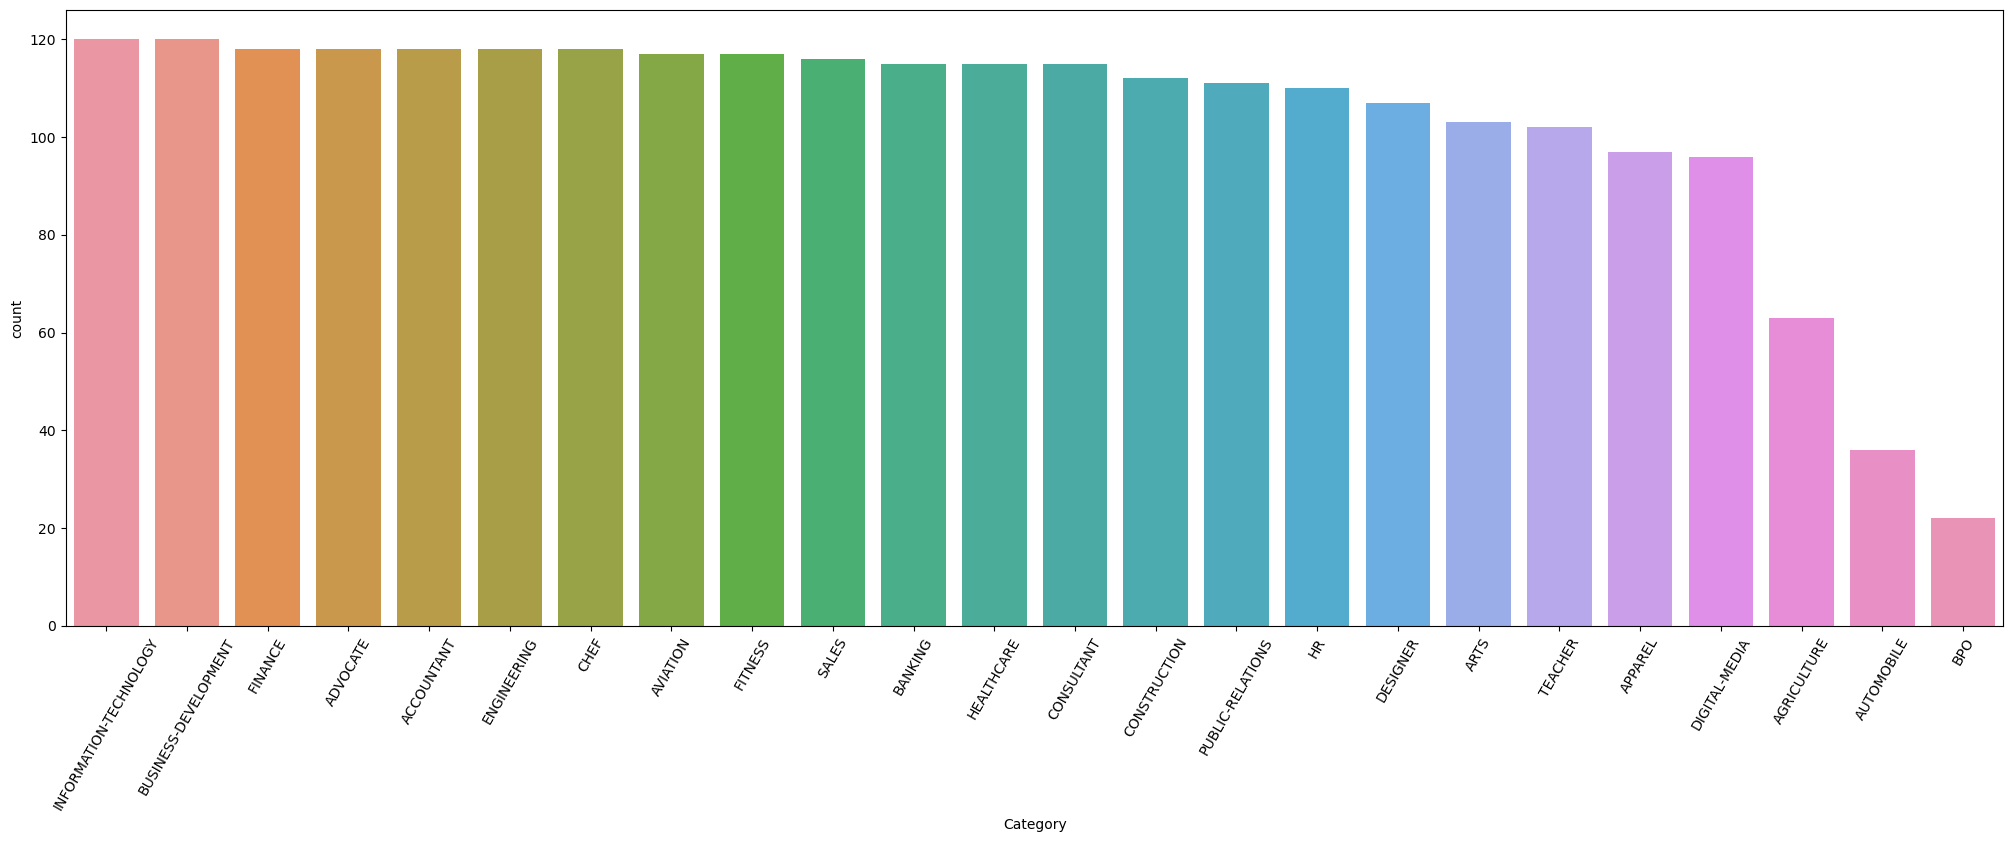

In [64]:
plt.figure(figsize=(25,8))
plt.xticks(rotation=60)
# count plot on single categorical variable
sns.countplot(x ='Category', data= df, order= df['Category'].value_counts().index)
 
# Show the plot
plt.show()

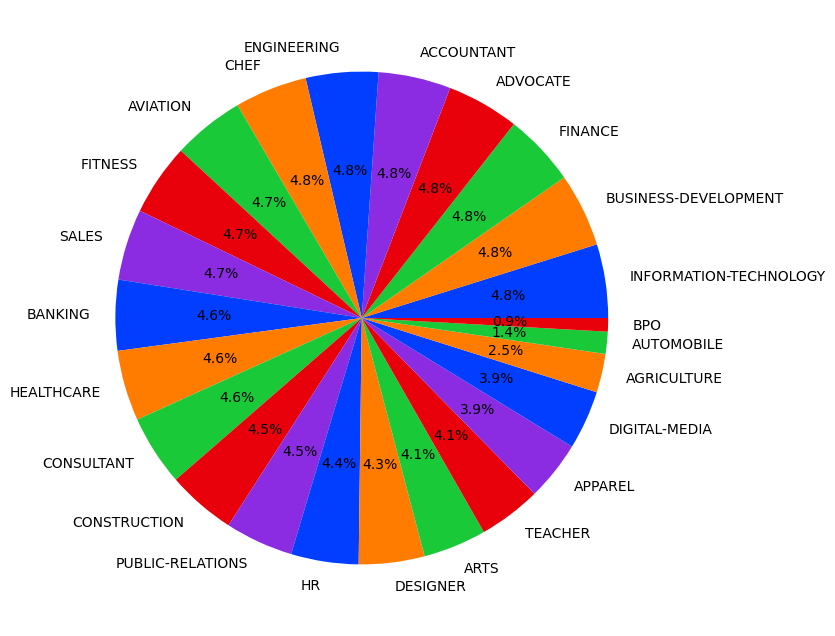

In [65]:
plt.figure(figsize=(25,8))

#define Seaborn color palette to use
colors= sns.color_palette('bright')[0:5]

#create pie chart
plt.pie(categories['Category'], labels= categories['index'], colors = colors, autopct='%.1f%%')
plt.show()

In [66]:
df1= df.copy()


In [67]:
df1.sort_values(by='Category', inplace=True)

In [68]:
df1

,ID,Resume_str,Resume_html,Category
1912,17306905,SENIOR ACCOUNTANT Experienc...,"<div class=""LCA skn-cbg1 fontsize fontface vma...",ACCOUNTANT
1850,13130984,ACCOUNTANT Summary Innovati...,"<div class=""fontsize fontface vmargins hmargin...",ACCOUNTANT
1851,25127518,ACCOUNTANT Summary Experienc...,"<div class=""fontsize fontface vmargins hmargin...",ACCOUNTANT
1852,24799301,ACCOUNTANT Summary Accountan...,"<div class=""fontsize fontface vmargins hmargin...",ACCOUNTANT
1853,25067742,ACCOUNTANT Summary If you ne...,"<div class=""fontsize fontface vmargins hmargin...",ACCOUNTANT
...,...,...,...,...
360,14958913,TEACHER Interests RANG...,"<div class=""fontsize fontface vmargins hmargin...",TEACHER
359,18001081,TEACHER Summary Kind a...,"<div class=""fontsize fontface vmargins hmargin...",TEACHER
358,69005326,TEACHER Professional Backgrou...,"<div class=""fontsize fontface vmargins hmargin...",TEACHER
368,22510753,TEACHER Summary Seeking an E...,"<div class=""fontsize fontface vmargins hmargin...",TEACHER


In [69]:
print(df1.columns)

Index(['ID', 'Resume_str', 'Resume_html', 'Category'], dtype='object')


In [70]:
df1['Resume_str1'] = df1['Resume_str'].str.replace(r'\s+', ' ', regex=True)
df1['Resume_html1'] = df1['Resume_html'].str.replace(r'\s+', ' ', regex=True)


In [71]:
df1['Category'] = df1['Category'].str.title()

In [72]:
df1['Category'].replace({'Information-Technology': 'ICT', 'Hr': 'HR', 'Business-Development': 'Business Development', 'Digital-Media': 'Digital Media', 'Bpo': 'BPO', 'Public-Relations': 'Public Relations', 'Healthcare': 'Healthcare & Fitness', 'Fitness': 'Healthcare & Fitness'}, inplace=True)

In [73]:
df1

,ID,Resume_str,Resume_html,Category,Resume_str1,Resume_html1
1912,17306905,SENIOR ACCOUNTANT Experienc...,"<div class=""LCA skn-cbg1 fontsize fontface vma...",Accountant,SENIOR ACCOUNTANT Experience Senior Accountan...,"<div class=""LCA skn-cbg1 fontsize fontface vma..."
1850,13130984,ACCOUNTANT Summary Innovati...,"<div class=""fontsize fontface vmargins hmargin...",Accountant,ACCOUNTANT Summary Innovative Accountant prof...,"<div class=""fontsize fontface vmargins hmargin..."
1851,25127518,ACCOUNTANT Summary Experienc...,"<div class=""fontsize fontface vmargins hmargin...",Accountant,"ACCOUNTANT Summary Experienced, detail-orient...","<div class=""fontsize fontface vmargins hmargin..."
1852,24799301,ACCOUNTANT Summary Accountan...,"<div class=""fontsize fontface vmargins hmargin...",Accountant,ACCOUNTANT Summary Accountant for a Medium si...,"<div class=""fontsize fontface vmargins hmargin..."
1853,25067742,ACCOUNTANT Summary If you ne...,"<div class=""fontsize fontface vmargins hmargin...",Accountant,ACCOUNTANT Summary If you need someone who de...,"<div class=""fontsize fontface vmargins hmargin..."
...,...,...,...,...,...,...
360,14958913,TEACHER Interests RANG...,"<div class=""fontsize fontface vmargins hmargin...",Teacher,TEACHER Interests RANGOLI DANCE COMPANY Los A...,"<div class=""fontsize fontface vmargins hmargin..."
359,18001081,TEACHER Summary Kind a...,"<div class=""fontsize fontface vmargins hmargin...",Teacher,TEACHER Summary Kind and compassionate Elemen...,"<div class=""fontsize fontface vmargins hmargin..."
358,69005326,TEACHER Professional Backgrou...,"<div class=""fontsize fontface vmargins hmargin...",Teacher,TEACHER Professional Background Certified Nur...,"<div class=""fontsize fontface vmargins hmargin..."
368,22510753,TEACHER Summary Seeking an E...,"<div class=""fontsize fontface vmargins hmargin...",Teacher,TEACHER Summary Seeking an Education Coordina...,"<div class=""fontsize fontface vmargins hmargin..."


In [74]:
df1['Category'].replace({'Hadoop': 'Data Science'}, inplace=True)

In [75]:
df1.rename(columns = {'Resume_str': 'Resume'}, inplace=True)

In [76]:
df1

,ID,Resume,Resume_html,Category,Resume_str1,Resume_html1
1912,17306905,SENIOR ACCOUNTANT Experienc...,"<div class=""LCA skn-cbg1 fontsize fontface vma...",Accountant,SENIOR ACCOUNTANT Experience Senior Accountan...,"<div class=""LCA skn-cbg1 fontsize fontface vma..."
1850,13130984,ACCOUNTANT Summary Innovati...,"<div class=""fontsize fontface vmargins hmargin...",Accountant,ACCOUNTANT Summary Innovative Accountant prof...,"<div class=""fontsize fontface vmargins hmargin..."
1851,25127518,ACCOUNTANT Summary Experienc...,"<div class=""fontsize fontface vmargins hmargin...",Accountant,"ACCOUNTANT Summary Experienced, detail-orient...","<div class=""fontsize fontface vmargins hmargin..."
1852,24799301,ACCOUNTANT Summary Accountan...,"<div class=""fontsize fontface vmargins hmargin...",Accountant,ACCOUNTANT Summary Accountant for a Medium si...,"<div class=""fontsize fontface vmargins hmargin..."
1853,25067742,ACCOUNTANT Summary If you ne...,"<div class=""fontsize fontface vmargins hmargin...",Accountant,ACCOUNTANT Summary If you need someone who de...,"<div class=""fontsize fontface vmargins hmargin..."
...,...,...,...,...,...,...
360,14958913,TEACHER Interests RANG...,"<div class=""fontsize fontface vmargins hmargin...",Teacher,TEACHER Interests RANGOLI DANCE COMPANY Los A...,"<div class=""fontsize fontface vmargins hmargin..."
359,18001081,TEACHER Summary Kind a...,"<div class=""fontsize fontface vmargins hmargin...",Teacher,TEACHER Summary Kind and compassionate Elemen...,"<div class=""fontsize fontface vmargins hmargin..."
358,69005326,TEACHER Professional Backgrou...,"<div class=""fontsize fontface vmargins hmargin...",Teacher,TEACHER Professional Background Certified Nur...,"<div class=""fontsize fontface vmargins hmargin..."
368,22510753,TEACHER Summary Seeking an E...,"<div class=""fontsize fontface vmargins hmargin...",Teacher,TEACHER Summary Seeking an Education Coordina...,"<div class=""fontsize fontface vmargins hmargin..."


In [77]:
def data_clean(text):
    text = re.sub('http\S+\s*', ' ', text)  # remove URLs
    text = re.sub('RT|cc', ' ', text)  # remove RT and cc
    text = re.sub('#\S+', '', text)  # remove hashtags
    text = re.sub('@\S+', '  ', text)  # remove mentions
    text = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', text)  # remove punctuations
    text = re.sub(r'[^\x00-\x7f]',r' ', text) 
    text = re.sub('\s+', ' ', text)  # remove extra whitespace
    return text.lower()

In [78]:
df1['Resume_str1'] = df1['Resume_str1'].apply(lambda x: data_clean(x))
df1
print(df1.columns)

Index(['ID', 'Resume', 'Resume_html', 'Category', 'Resume_str1',
       'Resume_html1'],
      dtype='object')


In [79]:
df1.drop('Resume_html1', axis=1, inplace=True)
df1.drop('Resume_html', axis=1, inplace=True)
df1

,ID,Resume,Category,Resume_str1
1912,17306905,SENIOR ACCOUNTANT Experienc...,Accountant,senior accountant experience senior a ountant...
1850,13130984,ACCOUNTANT Summary Innovati...,Accountant,accountant summary innovative a ountant profi...
1851,25127518,ACCOUNTANT Summary Experienc...,Accountant,accountant summary experienced detail oriente...
1852,24799301,ACCOUNTANT Summary Accountan...,Accountant,accountant summary a ountant for a medium siz...
1853,25067742,ACCOUNTANT Summary If you ne...,Accountant,accountant summary if you need someone who de...
...,...,...,...,...
360,14958913,TEACHER Interests RANG...,Teacher,teacher interests rangoli dance company los a...
359,18001081,TEACHER Summary Kind a...,Teacher,teacher summary kind and compassionate elemen...
358,69005326,TEACHER Professional Backgrou...,Teacher,teacher professional background certified nur...
368,22510753,TEACHER Summary Seeking an E...,Teacher,teacher summary seeking an education coordina...


In [80]:
df1['Cleaned_Resume'] = df1['Resume_str1'].apply(lambda x: data_clean(x))
df1.sample(10)

,ID,Resume,Category,Resume_str1,Cleaned_Resume
1201,56792999,MANAGING CONSULTANT Summary ...,Consultant,managing consultant summary highly a omplishe...,managing consultant summary highly a omplishe...
2483,37473139,STOREKEEPER II Professional Sum...,Aviation,storekeeper ii professional summary the purpo...,storekeeper ii professional summary the purpo...
587,19738730,BUSINESS DEVELOPMENT INTERN S...,Business Development,business development intern summary highly sk...,business development intern summary highly sk...
1946,28815362,CONSTRUCTION INSPECTOR Profil...,Construction,construction inspector profile civil engineer...,construction inspector profile civil engineer...
24,87968870,HR GENERALIST Summary Ener...,HR,hr generalist summary energetic bilingual hum...,hr generalist summary energetic bilingual hum...
277,27770859,INFORMATION TECHNOLOGY ADMINISTRATOR ...,ICT,information technology administrator professi...,information technology administrator professi...
1964,14585273,CONSTRUCTION SERVICES PROJECT MANAGER...,Construction,construction services project manager summary...,construction services project manager summary...
1420,13264154,CHEF INSTRUCTOR Professional Su...,Chef,chef instructor professional summary pastry c...,chef instructor professional summary pastry c...
375,36569713,TEACHER Summary Teacher...,Teacher,teacher summary teacher devoted to helping ch...,teacher summary teacher devoted to helping ch...
464,29926588,VOLUNTEER ADVOCATE Summary ...,Advocate,volunteer advocate summary talented bachelor ...,volunteer advocate summary talented bachelor ...


In [100]:
print(df1['Cleaned_Resume'])

1912     senior a ountant experience senior a ountant ...
1850     a ountant summary innovative a ountant profic...
1851     a ountant summary experienced detail oriented...
1852     a ountant summary a ountant for a medium size...
1853     a ountant summary if you need someone who del...
                              ...                        
360      teacher interests rangoli dance company los a...
359      teacher summary kind and compassionate elemen...
358      teacher professional background certified nur...
368      teacher summary seeking an education coordina...
433      substitute teacher summary administrative ass...
Name: Cleaned_Resume, Length: 2484, dtype: object


In [81]:
df1.drop('Resume_str1', axis=1, inplace=True)

In [82]:
del_words = [
    'name', 'city', 'state', 'country', 'fullname', 'company', 'resume', 'curriculum vitae', 'address',
    'phone', 'email', 'linkedin', 'profile', 'summary', 'objective', 'experience', 'education', 'skill', 'skills',
    'reference', 'references', 'contact', 'detail', 'details', 'mail', 'gmail', 'yahoo', 'hotmail', 'mailing',
    'linkedin', 'twitter', 'facebook', 'instagram', 'website', 'web', 'url', 'www', 'year', 'Recruitment',
    'Human Resources', 'Talent Acquisition', 'HR Manager', 'Employee Engagement', 'Designer', 'Creative',
    'Graphic Design', 'UI/UX', 'Adobe Creative Suite', 'Visualization', 'Information Technology', 'IT', 'Software Development',
    'Programming', 'Cybersecurity', 'System Analysis', 'Education', 'Classroom Management', 'Lesson Planning', 'Pedagogy',
    'Curriculum Development', 'Advocate', 'Legal', 'Litigation', 'Legal Research', 'Courtroom', 'Legal Counsel',
    'Business Development', 'Sales', 'Client Acquisition', 'Market Research', 'Strategic Partnerships', 'Lead Generation',
    'Healthcare', 'Medical', 'Patient Care', 'Healthcare Administration', 'Nursing', 'Health Informatics',
    'Fitness', 'Wellness', 'Personal Training', 'Physical Fitness', 'Nutrition', 'Exercise Physiology',
    'Agribusiness', 'Crop Management', 'Sustainable Agriculture', 'Agronomy', 'Farming Practices',
    'Outsourcing', 'Customer Support', 'Call Center', 'Service Delivery', 'Process Optimization'
]

In [83]:
stop_words = set(stopwords.words('english')+['``',"''"]+del_words)
total_words = []
sentences = df1['Cleaned_Resume'].values
cleaned_sentences = ""
for sentence in sentences:
    cleaned_sentences += sentence
    required_words = nltk.word_tokenize(sentence)
    for word in required_words:
        if word not in stop_words and word not in string.punctuation:
            total_words.append(word)

In [84]:
df1

,ID,Resume,Category,Cleaned_Resume
1912,17306905,SENIOR ACCOUNTANT Experienc...,Accountant,senior a ountant experience senior a ountant ...
1850,13130984,ACCOUNTANT Summary Innovati...,Accountant,a ountant summary innovative a ountant profic...
1851,25127518,ACCOUNTANT Summary Experienc...,Accountant,a ountant summary experienced detail oriented...
1852,24799301,ACCOUNTANT Summary Accountan...,Accountant,a ountant summary a ountant for a medium size...
1853,25067742,ACCOUNTANT Summary If you ne...,Accountant,a ountant summary if you need someone who del...
...,...,...,...,...
360,14958913,TEACHER Interests RANG...,Teacher,teacher interests rangoli dance company los a...
359,18001081,TEACHER Summary Kind a...,Teacher,teacher summary kind and compassionate elemen...
358,69005326,TEACHER Professional Backgrou...,Teacher,teacher professional background certified nur...
368,22510753,TEACHER Summary Seeking an E...,Teacher,teacher summary seeking an education coordina...


In [85]:
word_freq_fist = nltk.FreqDist(total_words)
most_freq = word_freq_fist.most_common(100)
print(most_freq)


[('management', 12174), ('sales', 8275), ('customer', 7927), ('business', 7866), ('new', 6407), ('service', 6223), ('team', 6073), ('development', 5731), ('training', 5637), ('project', 5362), ('work', 4817), ('manager', 4534), ('information', 4502), ('marketing', 4489), ('financial', 4227), ('office', 4186), ('support', 4076), ('including', 4045), ('staff', 3949), ('professional', 3857), ('data', 3797), ('system', 3697), ('systems', 3559), ('university', 3477), ('managed', 3431), ('process', 3428), ('customers', 3418), ('design', 3383), ('quality', 3367), ('client', 3272), ('clients', 3244), ('developed', 3228), ('reports', 3083), ('analysis', 3052), ('operations', 3008), ('product', 2951), ('high', 2950), ('program', 2934), ('services', 2847), ('ounting', 2843), ('microsoft', 2830), ('01', 2793), ('2014', 2792), ('current', 2787), ('ounts', 2782), ('maintained', 2775), ('responsible', 2719), ('software', 2644), ('2013', 2554), ('procedures', 2549), ('time', 2539), ('planning', 2532),

In [86]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
most_freq_str = ' '.join(word for word, _ in most_freq)
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to C:\Users\Shrinjita
[nltk_data]     Paul\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Shrinjita
[nltk_data]     Paul\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [87]:
def remove_stop_words(text):
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    filtered_text = [word for word in word_tokens if word.lower() not in stop_words]
    return ' '.join(filtered_text)
most_freq_filtered = remove_stop_words(most_freq_str)
print(f"Filtered Most Frequent Words: {most_freq_filtered}")


Filtered Most Frequent Words: management sales customer business new service team development training project work manager information marketing financial office support including staff professional data system systems university managed process customers design quality client clients developed reports analysis operations product high program services ounting microsoft 01 2014 current ounts maintained responsible software 2013 procedures time planning school projects communication performance ensure equipment leadership daily needs provided 2012 su 2015 inventory employees media issues well technical department budget knowledge technology using employee activities created food years programs health science january safety control various administration 2011 relations students engineering worked policies maintain monthly research production products


In [88]:
word_count = len(most_freq_filtered.split())

# Print the result
print(f"Number of words in most_freq_filtered: {word_count}")

Number of words in most_freq_filtered: 100


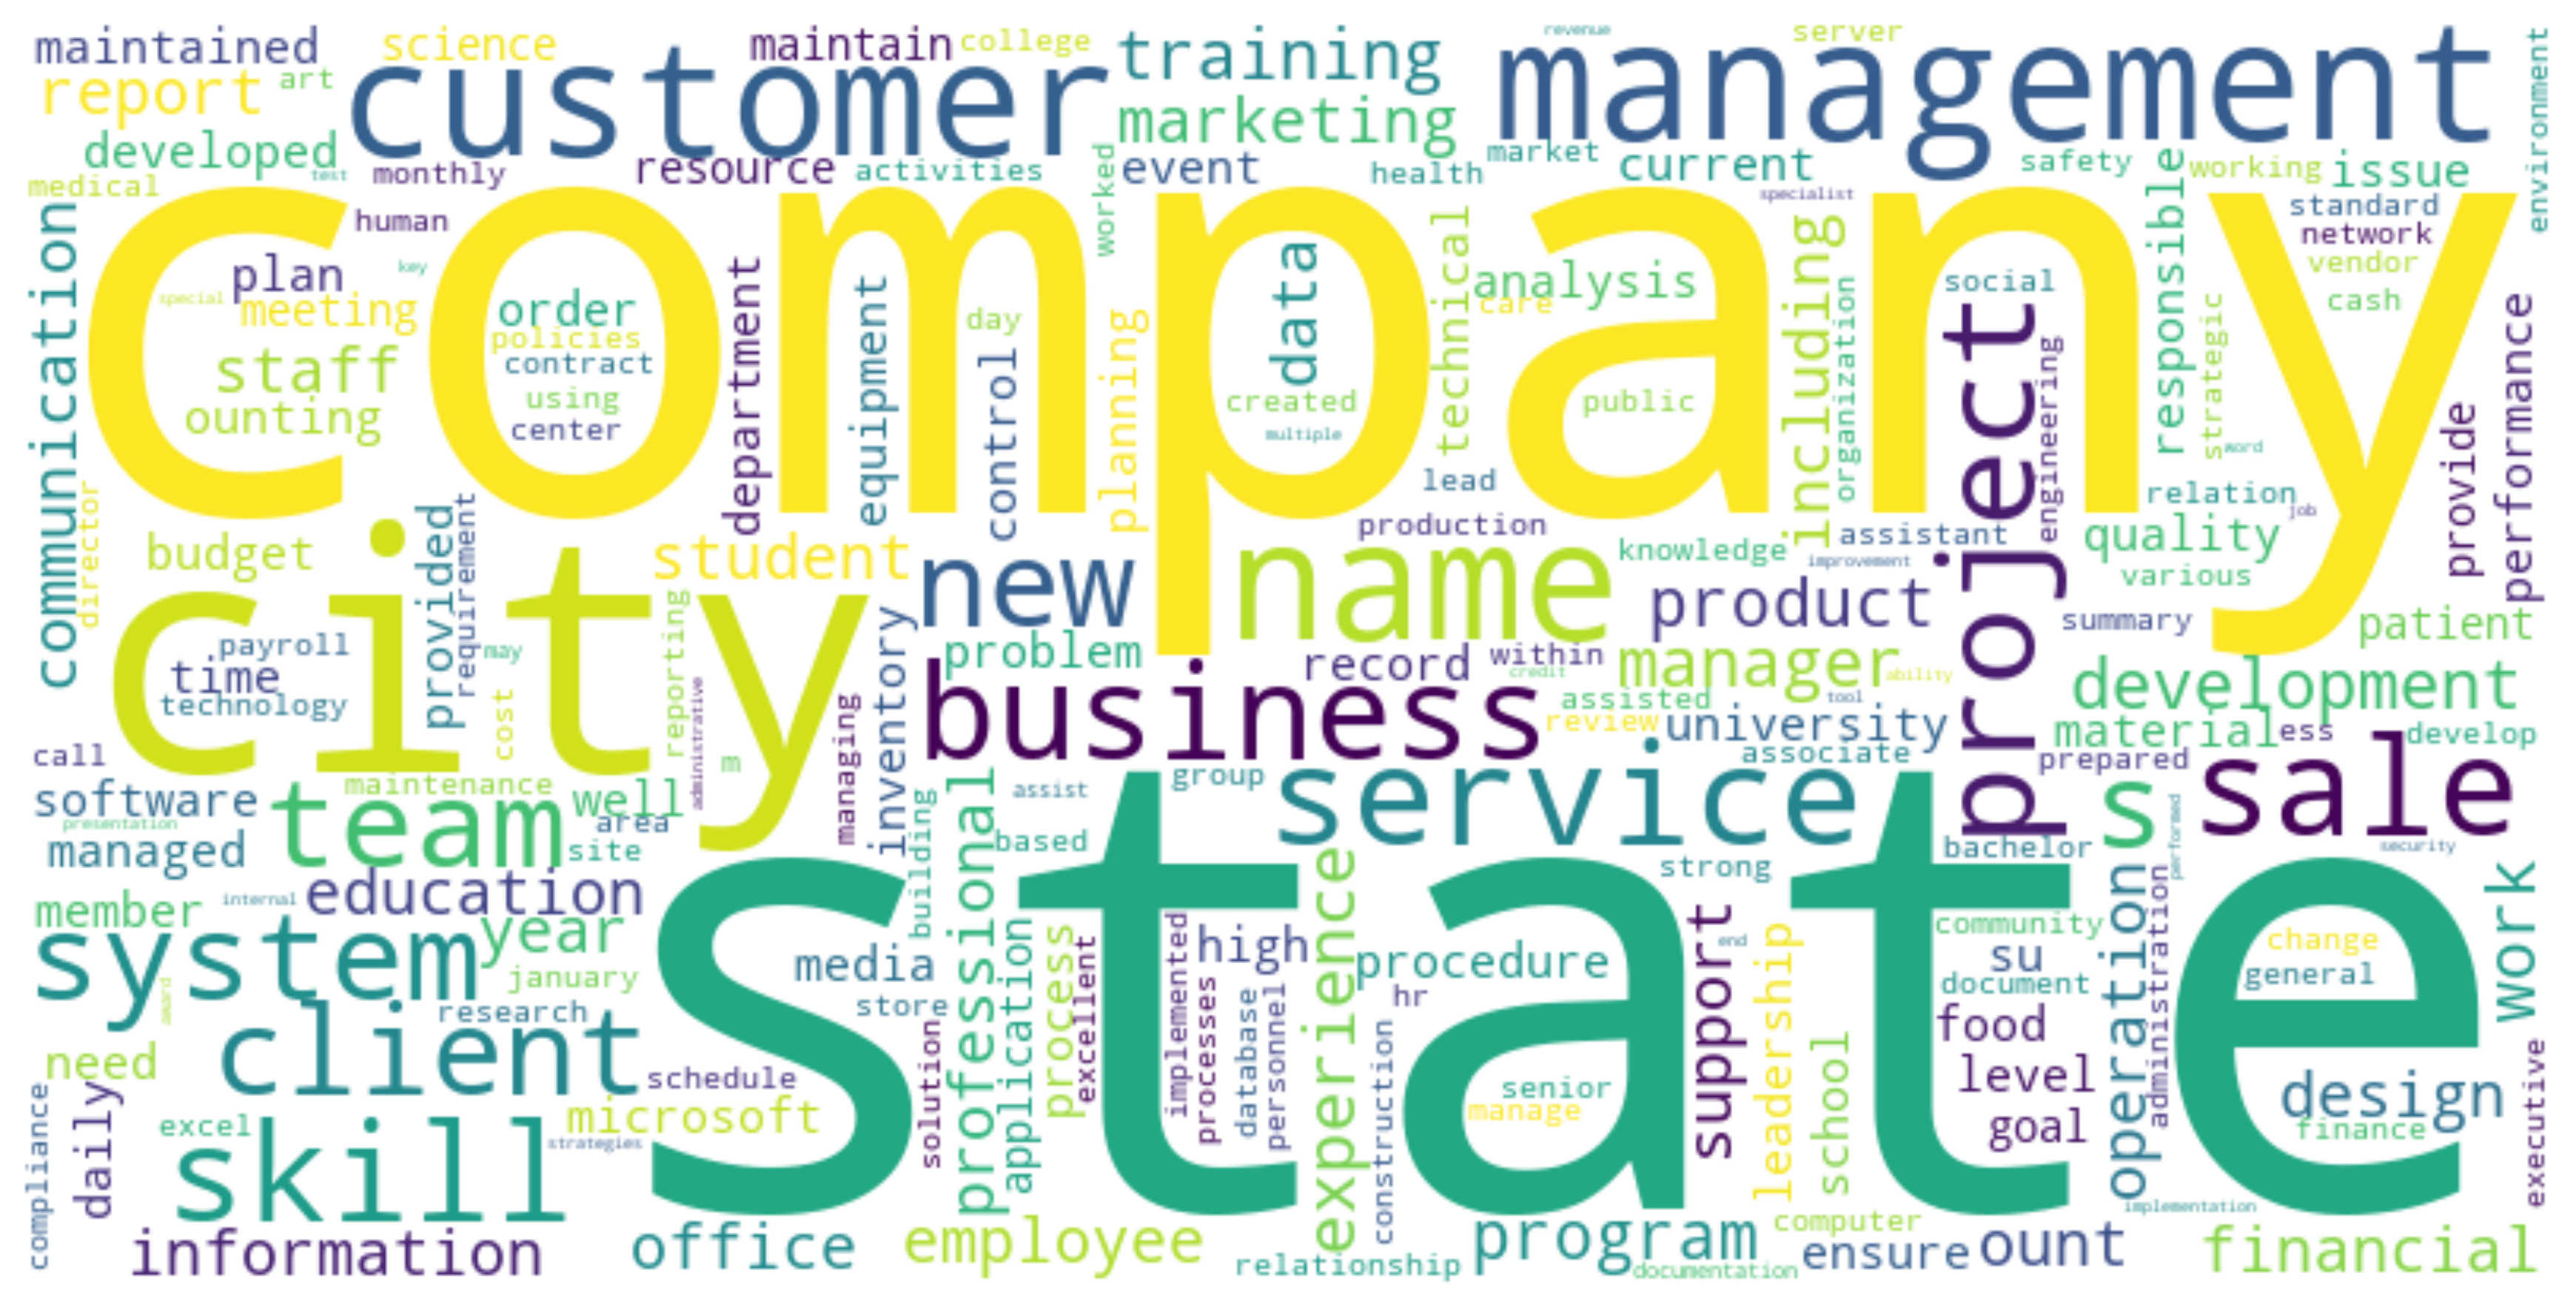

In [89]:
wc = WordCloud(collocations=False, width=800, height=400, background_color='white').generate(cleaned_sentences)
plt.figure(figsize=(12,6), dpi=300)
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.tight_layout()
plt.show()

In [90]:
df['Category_encoded'] = LabelEncoder().fit_transform(df['Category'])

In [91]:
def label_table(df):
    label_table = pd.DataFrame({
        'Original': df['Category'].unique(),
        'Label': df['Category_encoded'].unique(),
        'Count': df.groupby('Category')['Category'].count().values
    })
    label_table.sort_values(by='Count', ascending=False, inplace=True)
    return label_table

In [92]:
label_table(df).style.background_gradient(cmap='Purples')


,Original,Label,Count
20,PUBLIC-RELATIONS,21,120
9,BPO,8,120
0,HR,19,118
1,DESIGNER,13,118
16,APPAREL,3,118
15,FINANCE,16,118
10,SALES,22,118
17,ENGINEERING,15,117
6,HEALTHCARE,18,117
22,ARTS,4,116


In [93]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack

In [94]:
print(df.columns)


Index(['ID', 'Resume_str', 'Resume_html', 'Category', 'Category_encoded'], dtype='object')


In [95]:
text = df1['Cleaned_Resume'].values
target = df1['Category'].values

word_vectorizer = TfidfVectorizer(
    sublinear_tf = True,
    stop_words = 'english'
)

word_vectorizer.fit(text)
word_features = word_vectorizer.transform(text)

print("Feature processing completed..")

print(word_features)

Feature processing completed..
  (0, 39647)	0.012008271506854918
  (0, 39341)	0.013556203059062428
  (0, 39330)	0.022794727668787658
  (0, 39317)	0.029815014485551027
  (0, 39047)	0.033896380980496306
  (0, 38870)	0.04605265815609912
  (0, 38865)	0.04005341227944239
  (0, 38467)	0.05064883120379741
  (0, 38428)	0.060468087075307764
  (0, 38345)	0.1349979760042877
  (0, 38040)	0.05968711596323869
  (0, 37881)	0.05228804171870316
  (0, 37824)	0.06751605223528737
  (0, 37821)	0.07455810202551963
  (0, 37805)	0.050192239417989094
  (0, 37673)	0.02289165819075623
  (0, 37657)	0.03659687158234672
  (0, 37650)	0.026214431953636465
  (0, 37577)	0.029504246978138655
  (0, 37575)	0.056696908960794455
  (0, 37489)	0.05961549096212701
  (0, 37405)	0.009472373693444745
  (0, 36720)	0.08254321638435805
  (0, 36677)	0.05671380154404737
  (0, 36461)	0.07805336799461388
  :	:
  (2483, 2617)	0.049772747666138956
  (2483, 2562)	0.07449093116686478
  (2483, 2420)	0.0671527940959133
  (2483, 2365)	0.040050

In [96]:
X_train, X_test, y_train, y_test = train_test_split(word_features, target, random_state=42, test_size=0.2, shuffle=True, stratify=target)
print(f'Train data: \nRows: {X_train.shape[0]} and Columns: {X_train.shape[1]}')
print(f'Test data: \nRows: {X_test.shape[0]} and Columns: {X_test.shape[1]}')

Train data: 
Rows: 1987 and Columns: 39848
Test data: 
Rows: 497 and Columns: 39848


In [97]:
clf = OneVsRestClassifier(KNeighborsClassifier())
%time clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
print(f'Accuracy of KNeighbors Classifier on training set: :.2f{clf.score(X_train, y_train)}')
print(f'Accuracy of KNeighbors Classifier on test set: :.2f{clf.score(X_test, y_test)}')

Wall time: 152 ms
Accuracy of KNeighbors Classifier on training set: :.2f0.653749370910921
Accuracy of KNeighbors Classifier on test set: :.2f0.5251509054325956


In [98]:
clf_report = metrics.classification_report(y_test, prediction)
print(f"Classification report: \n{clf_report}")

Classification report: 
                      precision    recall  f1-score   support

          Accountant       0.51      0.75      0.61        24
            Advocate       0.50      0.25      0.33        24
         Agriculture       1.00      0.23      0.38        13
             Apparel       0.29      0.11      0.15        19
                Arts       0.57      0.19      0.29        21
          Automobile       1.00      0.14      0.25         7
            Aviation       0.82      0.61      0.70        23
                 BPO       0.00      0.00      0.00         4
             Banking       0.80      0.52      0.63        23
Business Development       0.32      0.58      0.41        24
                Chef       0.81      0.88      0.84        24
        Construction       0.74      0.77      0.76        22
          Consultant       0.00      0.00      0.00        23
            Designer       0.70      0.67      0.68        21
       Digital Media       0.65      0.58    

In [102]:
!pip install spacy


     ---------------------------------------- 12.2/12.2 MB 5.1 MB/s eta 0:00:00
     ---------------------------------------- 50.1/50.1 kB 2.5 MB/s eta 0:00:00
     -------------------------------------- 394.2/394.2 kB 4.9 MB/s eta 0:00:00
     -------------------------------------- 122.7/122.7 kB 1.4 MB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 6.8 MB/s eta 0:00:00
     ---------------------------------------- 45.9/45.9 kB 2.2 MB/s eta 0:00:00
     -------------------------------------- 483.8/483.8 kB 6.1 MB/s eta 0:00:00
     -------------------------------------- 181.6/181.6 kB 2.2 MB/s eta 0:00:00
     ---------------------------------------- 1.9/1.9 MB 5.1 MB/s eta 0:00:00
     ---------------------------------------- 6.6/6.6 MB 3.4 MB/s eta 0:00:00
  Using cached colorama-0.4.6-py2.py3-none-any.whl (25 kB)
     ---------------------------------------- 45.0/45.0 kB 2.2 MB/s eta 0:00:00
  Attempting uninstall: typing-extensions
    Found existing instal

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
anaconda-project 0.11.1 requires ruamel-yaml, which is not installed.


In [103]:
!spacy download en_core_web_sm


     ---------------------------------------- 12.8/12.8 MB 4.0 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [105]:
df1

,ID,Resume,Category,Cleaned_Resume
1912,17306905,SENIOR ACCOUNTANT Experienc...,Accountant,senior a ountant experience senior a ountant ...
1850,13130984,ACCOUNTANT Summary Innovati...,Accountant,a ountant summary innovative a ountant profic...
1851,25127518,ACCOUNTANT Summary Experienc...,Accountant,a ountant summary experienced detail oriented...
1852,24799301,ACCOUNTANT Summary Accountan...,Accountant,a ountant summary a ountant for a medium size...
1853,25067742,ACCOUNTANT Summary If you ne...,Accountant,a ountant summary if you need someone who del...
...,...,...,...,...
360,14958913,TEACHER Interests RANG...,Teacher,teacher interests rangoli dance company los a...
359,18001081,TEACHER Summary Kind a...,Teacher,teacher summary kind and compassionate elemen...
358,69005326,TEACHER Professional Backgrou...,Teacher,teacher professional background certified nur...
368,22510753,TEACHER Summary Seeking an E...,Teacher,teacher summary seeking an education coordina...


In [108]:
import spacy
import pandas as pd

nlp = spacy.load("en_core_web_sm")

class Candidate:
    def __init__(self, candidate_id, resume_text, category):
        self.candidate_id = candidate_id
        self.resume_text = resume_text
        self.category = category

class JobDescription:
    def __init__(self, job_id, required_skills):
        self.job_id = job_id
        self.required_skills = required_skills

def extract_skills_from_text(text):
    doc = nlp(text)
    return [token.text.lower() for token in doc]

def match_candidate_with_job(candidate, job_description):
    candidate_keywords = set(extract_skills_from_text(candidate.resume_text))
    job_keywords = set([token.text.lower() for token in nlp(" ".join(job_description.required_skills))])

    similarity_coefficient = len(candidate_keywords.intersection(job_keywords)) / len(candidate_keywords.union(job_keywords))

    similarity_threshold = 0.5

    if similarity_coefficient >= similarity_threshold:
        return True
    else:
        return False

job_description = JobDescription(job_id=1, required_skills=['programming', 'teamwork', 'communication'])

for index, row in df1.iterrows():
    candidate = Candidate(candidate_id=row['ID'], resume_text=row['Resume'], category=row['Category'])
    
    if match_candidate_with_job(candidate, job_description):
        print(f"Match found for Candidate {candidate.candidate_id} with Job {job_description.job_id}")
